In [1]:
import pandas as pd # data frame library
import numpy as np # scientific computing library
from plotnine import * # plotting library

import warnings
warnings.filterwarnings('ignore')

In [2]:
iris = pd.read_csv("iris.csv")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## Regression Line

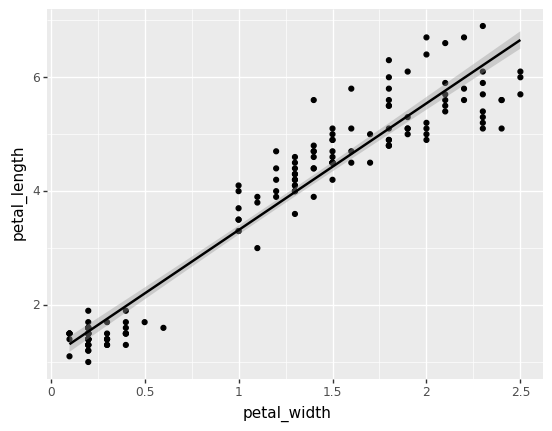

<ggplot: (144804790220)>

In [5]:
# petal_width vs petal_length
ggplot(iris,aes(x="petal_width",y="petal_length"))+geom_point()+geom_smooth(method="lm")

## Facet Wrap
* allows to create subplots around a categorical attribute

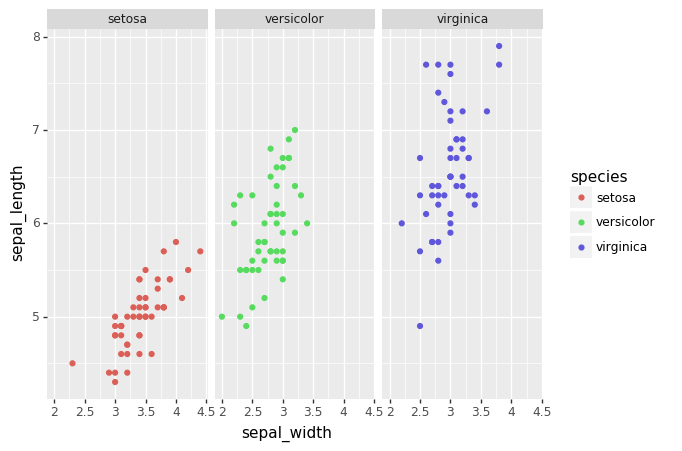

<ggplot: (-9223371892049975061)>

In [13]:
# sepal_width vs sepal_length, col = species
ggplot(iris,aes(x="sepal_width",y="sepal_length",colour='species'))+geom_point()+facet_wrap("species")

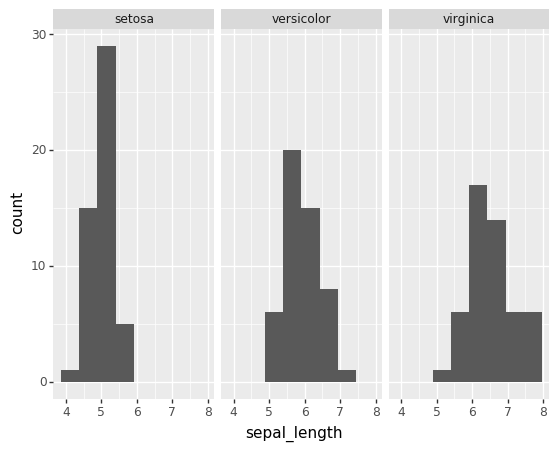

<ggplot: (144805029829)>

In [11]:
# sepal length, histogram
ggplot(iris,aes(x="sepal_length"))+geom_histogram()+facet_wrap('species')

## More Visualization Properties:

### Shape

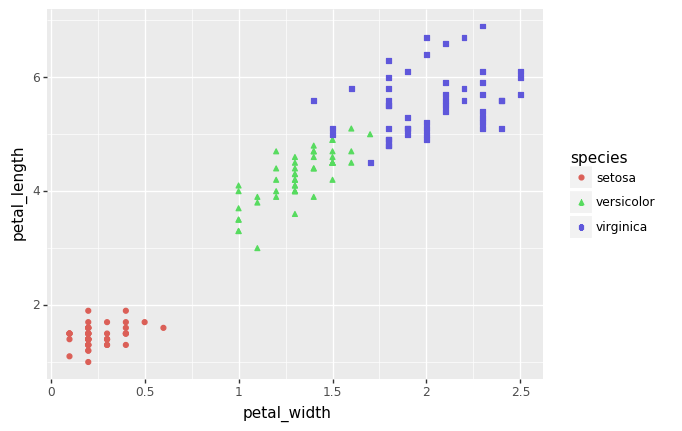

<ggplot: (-9223371892049838504)>

In [16]:

ggplot(iris,aes(x="petal_width",y="petal_length",colour='species',shape='species'))+geom_point()

### Multi-line Function Statement

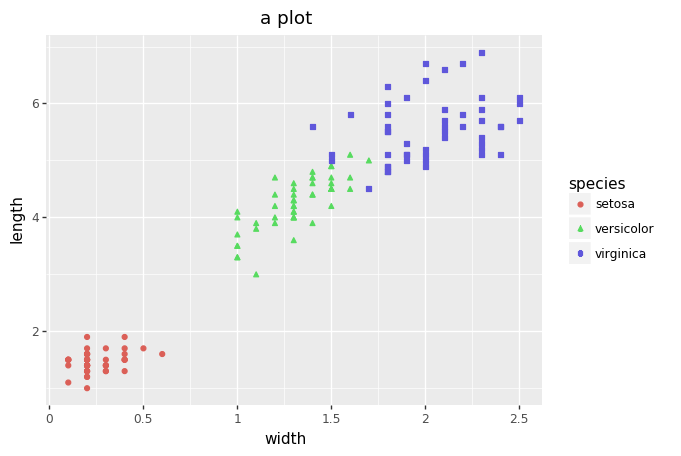

<ggplot: (144804734689)>

In [18]:
(
    ggplot(iris,aes(x="petal_width",y="petal_length",colour='species',shape='species'))
    +geom_point()
    +labs(title="a plot",x="width",y="length")
)

### Dynamic Subset Data

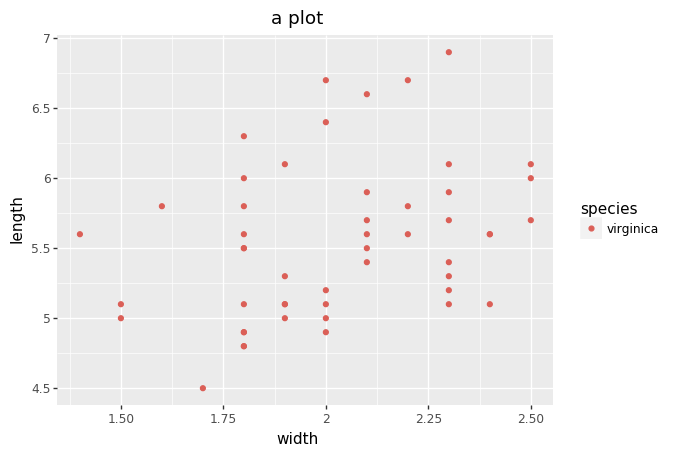

<ggplot: (-9223371892047938486)>

In [20]:
(
    ggplot(iris.loc[iris['species']=='setosa'],aes(x="petal_width",y="petal_length",colour='species',shape='species'))
    +geom_point()
    +labs(title="a plot",x="width",y="length")
)

### Themes

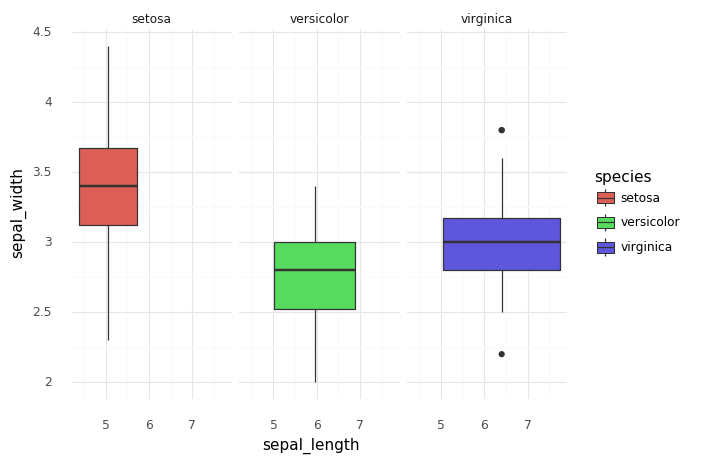

<ggplot: (144804826842)>

In [26]:
# sepal_length vs sepal_width, fill=facet_wrap=species, boxplot 
(
    ggplot(iris,aes(x='sepal_length',y='sepal_width',fill='species'))
    +geom_boxplot()
    +facet_wrap('species')
    +theme_minimal()
)

### Factored Attributes

In [27]:
titanic = pd.read_csv("02-titanic.csv")

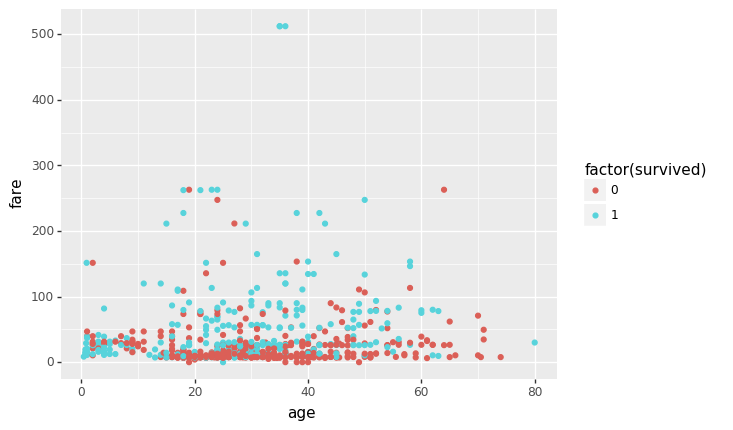

<ggplot: (-9223371892049985690)>

In [33]:
# fare vs age, col=survived, point
ggplot(titanic,aes(x='age',y='fare',colour='factor(survived)'))+geom_point()

## Missing Values

In [46]:
iris_missing = pd.read_csv("iris-missing.csv")

In [35]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [45]:
iris_missing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 116 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  116 non-null    float64
 1   sepal_width   116 non-null    float64
 2   petal_length  116 non-null    float64
 3   petal_width   116 non-null    float64
 4   species       116 non-null    object 
dtypes: float64(4), object(1)
memory usage: 5.4+ KB


### Break into groups of 2 and conduct an exploratory data analysis on the iris-missing data.

#### Remember to use the info and describe functions to see what the data looks like.
#### You can plot numerical and categorical attributes to visualize relationships
#### Ultimately, I want to know:
* what species the missing values belong to
* how do the missing values affect the distribution of the data (mean, standard deviation, skewness)
* how will missing values affect any algorithm I apply on the data
* how to decide whether to remove rows that have any missing values or to impute new values
* what value to use to fill in the missing data

In [40]:
iris_missing.loc[iris_missing['sepal_length'].isnull()]

,sepal_length,sepal_width,petal_length,petal_width,species
7,NaN,3.4,1.5,0.2,setosa
18,NaN,3.8,1.7,0.3,setosa
28,NaN,3.4,1.4,NaN,setosa
39,NaN,3.4,1.5,NaN,setosa
46,NaN,3.8,1.6,0.2,setosa
68,NaN,2.2,4.5,1.5,versicolor
78,NaN,2.9,4.5,1.5,versicolor
84,NaN,3.0,4.5,1.5,versicolor
90,NaN,2.6,4.4,1.2,versicolor
95,NaN,3.0,4.2,1.2,versicolor


In [41]:
iris.mean()

sepal_length    5.843333
sepal_width     3.054000
petal_length    3.758667
petal_width     1.198667
dtype: float64

In [43]:
iris_missing.mean()

sepal_length    5.826667
sepal_width     3.063194
petal_length    3.726573
petal_width     1.254225
dtype: float64

In [44]:
# removing all missing values
iris_missing = iris_missing.dropna()

In [48]:
petal_length_avg = iris_missing['petal_length'].mean()
petal_length_avg

3.7265734265734265

In [49]:
iris_missing['petal_length'].fillna(petal_length_avg,inplace=True)

In [51]:
iris_missing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  135 non-null    float64
 1   sepal_width   144 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   142 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [52]:
iris_missing['sepal_length'].mean()

5.826666666666666

In [55]:
means = iris_missing.groupby(['species'])['sepal_length'].mean()

In [63]:
means

species
setosa        4.982222
versicolor    5.955556
virginica     6.542222
Name: sepal_length, dtype: float64

In [67]:
iris_missing.loc[iris_missing['species']=='setosa','sepal_length']=means[0]
iris_missing.loc[iris_missing['species']=='versicolor','sepal_length']=means[1]
iris_missing.loc[iris_missing['species']=='virginica','sepal_length']=means[2]

0      4.982222
1      4.982222
2      4.982222
3      4.982222
4      4.982222
         ...   
145    6.542222
146    6.542222
147    6.542222
148    6.542222
149    6.542222
Name: sepal_length, Length: 150, dtype: float64